In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#### User inputs ####
file = pd.read_csv('results (44).csv') #### File name here ####
pastVal = 1                            #### What line to start at ####
endVal = 1000                          #### What line to end at ####

In [ ]:
df = pd.DataFrame(file)
df = df[pastVal:endVal]
df = df[['timestamp', 'payload']]
df.timestamp = (df.timestamp-(df.timestamp[pastVal]))
df.replace('{"ble_device_name":{"S":"Neuraprobe"},"indicated_value":{"S":"', '', inplace = True, regex = True)
df.replace('"}}', '', inplace = True, regex = True)
df['payload'] = df['payload'].astype(str)

def makeSense(hex):
    volt_arr = [((int(hex[i+2:i+4] + hex[i:i+2], 16))/1023)*3.6 for i in range(4, 404, 4)]
    return volt_arr
    
vals = np.array([makeSense(hex) for hex in df['payload']])
ms = np.array
voltages = np.array
for i in range(len(df['timestamp'])-1): 
    for j in range(len(vals[0])):
        timeInc = (df['timestamp'].iloc[i+1] - df['timestamp'].iloc[i])/100
        ms_val = df['timestamp'].iloc[i] + j*timeInc 
        ms = np.append(ms, ms_val)
        volts = vals[i][j]
        voltages = np.append(voltages, volts)
df2 = pd.DataFrame(ms , columns = ['time'])
df2['reading'] = voltages
df2 = df2.iloc[1: , :]

Text(0.5, 1.0, 'Voltage over time of photodiode response to a blinking green LED via Bluetooth')

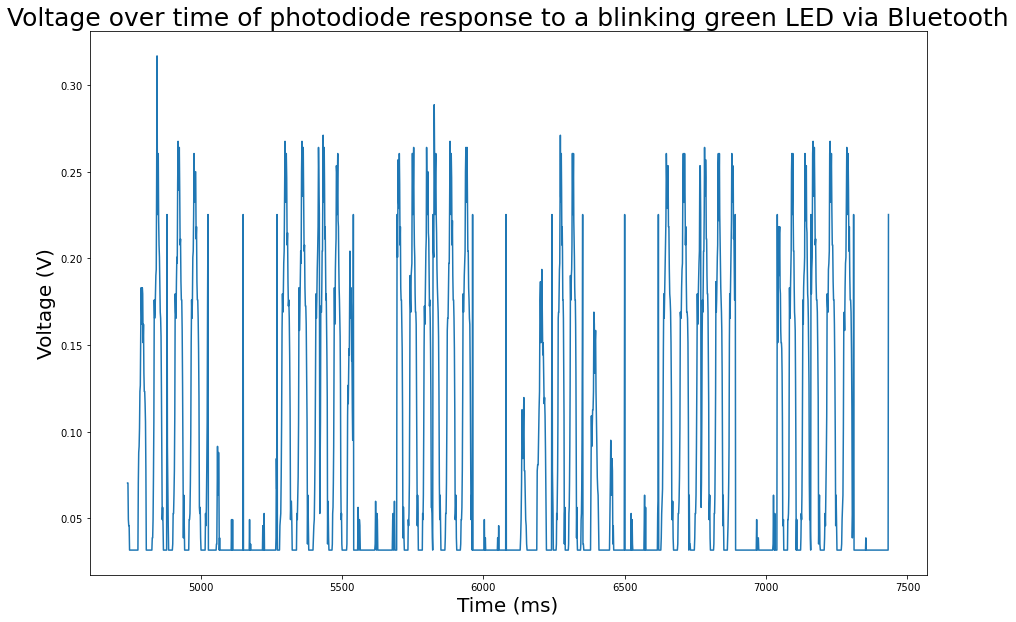

In [22]:
#### Figure parameters ####
plt.figure(figsize = (15,10))
plt.plot(df2['time'], df2['reading'])
plt.ylabel('Voltage (V)', fontsize = 20)
plt.xlabel('Time (ms)', fontsize = 20)
plt.title('Voltage over time', fontsize = 25)